In [794]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt 
import sys

In [795]:
# sigmoid function
def sigmoid(z):
    pred = 1 / (1 + np.exp(-z))
    return pred

In [796]:
# log regression prediction function
def pred(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [797]:
# Log regression loss function
def loss_func(h, y):
    m = h.shape[0]
    J = (1/m)*np.sum((-y*np.log(h))-((1-y)*np.log(1-h)))
    return J

In [798]:
def gradient_desc(X, y, learning_rate, iterations):
    theta = np.random.rand(X.shape[1],1) #matrix must = num_features X 1 column
    cost_hist = []
    
    for i in range(1,iterations):
        h = pred(X,theta).reshape(X.shape[0],1)
        grad = np.dot(X.T, (h - y.reshape(y.shape[0],1))) / y.shape[0]
        theta = theta.reshape(X.shape[1],1) - (learning_rate * grad)
        cost_hist.append(loss_func(h,y.reshape(y.shape[0],1)))
        #print('Loss at iteration ',i,':',loss_func(h,y.reshape(y.shape[0],1)))
        
    return theta, cost_hist

In [799]:
def normalize(dataset):
    col_min = []
    col_max = []
    rng = []
    
    num_row = dataset.shape[0]
    num_col = dataset.shape[1]
    
    for c in range(0,num_col):
        col_min.append(np.min(dataset[:,c]))
        col_max.append(np.max(dataset[:,c]))
        rng.append(col_max[c] - col_min[c])
        dataset[:,c] = 1 - ((col_max[c] - dataset[:,c])/rng[c])
    
    return dataset

In [800]:
def train_test_split(dataset, perc_split):
    np.random.shuffle(dataset)
    num_row = dataset.shape[0]
    num_col = dataset.shape[1]
    #insert error if perc_split is >1, or <0
    split_index = round(perc_split * num_row)
    remainder = num_row - split_index
    
    x_train = dataset[0:split_index, 0:num_col-1] 
    y_train = dataset[0:split_index, num_col-1]
    
    x_test = dataset[split_index:num_row, 0:num_col-1] 
    y_test = dataset[split_index:num_row, num_col-1]
    
    return x_train, y_train, x_test, y_test

In [801]:
# Credit Risk Example Analysis
import csv
import pandas as pd

df = pd.read_csv("fake_risk_data.csv") 

num_col = len(df.columns)
num_row = len(df.index)

print('Summary of Raw Data File...')
print('Number of Columns in data: ',num_col)
print('Number of Rows in data: ',num_row)

df.head()

Summary of Raw Data File...
Number of Columns in data:  7
Number of Rows in data:  50


,credit_score,past_dlq,income,employed,dti,num_loans,defaulted
0,746,0,131046,1,0.991888,2,0
1,867,0,153942,1,3.165010,3,0
2,818,0,186653,1,1.436693,2,0
3,880,0,104840,1,2.621929,2,0
4,651,0,196619,1,0.830759,3,0


In [802]:
df = pd.read_csv("fake_risk_data.csv")
dataset = df.values
x_train, y_train, x_test, y_test = train_test_split(dataset,.8)
x_train = normalize(x_train)

In [803]:
learning_rate = 0.01
iterations = 100000
theta,c_hist = gradient_desc(x_train, y_train, learning_rate, iterations)

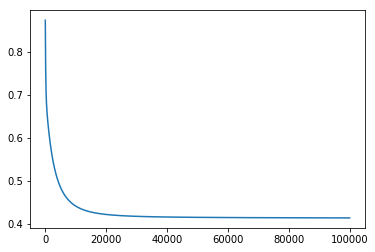

In [804]:
plt.plot(c_hist)

In [805]:
# test some examples
credit_score = 800
number_past_dlnq = 0
income = 150000
employed = 1
DTI = .7
num_loans = 3

inputs = [credit_score, number_past_dlnq, income, employed, DTI, num_loans]

#normalize input
for c in range(0,num_col-1):
    inputs[c] = 1 - ((col_max[c] - inputs[c])/rng[c])

#predicted output
if pred(inputs,theta)[0] > .5:
    print("High Risk. Probability = ",pred(inputs,theta)[0])
else:
    print("Low Risk. Probability = ",pred(inputs,theta)[0])

Low Risk. Probability =  0.24223032912556441


In [755]:
#next thing to do is run the prediction on the test set, and see how accurate it is

In [807]:
normalize(x_test)

array([[0.26811594, 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.42210145, 0.        , 0.58521811, 1.        , 0.0645086 ,
        1.        ],
       [0.05434783, 0.        , 0.40301802, 1.        , 0.61271401,
        1.        ],
       [0.55615942, 0.        , 0.66649713, 1.        , 0.54988962,
        0.66666667],
       [0.6557971 , 0.        , 0.70749521, 1.        , 0.73055393,
        0.        ],
       [0.38405797, 0.        , 1.        , 1.        , 0.46056166,
        1.        ],
       [0.65398551, 0.        , 0.        , 0.        , 0.        ,
        0.66666667],
       [0.00543478, 0.        , 0.26185669, 1.        , 0.22426998,
        0.        ],
       [1.        , 0.        , 0.91177353, 1.        , 1.        ,
        0.66666667],
       [0.        , 1.        , 0.41186254, 1.        , 0.54385751,
        0.33333333]])

In [810]:
pred(x_test,theta)

array([[0.91347108],
       [0.66287178],
       [0.85015607],
       [0.29534014],
       [0.14014474],
       [0.34843986],
       [0.07428049],
       [0.92812187],
       [0.02001867],
       [0.99814573]])

In [811]:
y_test

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 1.])